In [1]:
import sys
import os

parent_dir = os.path.dirname(os.getcwd())
core_src_dir = os.path.join(parent_dir, "src/psiking-core")
sys.path.append(core_src_dir)

In [2]:
from psiking.core.base.schema import TextNode, ImageNode, TableNode, TextType, TextLabel, Document
from psiking.core.reader.pdf.docling_reader import DoclingPDFReader
from psiking.core.processor.document.text_merger import TextNodeMerger
from psiking.core.splitter.text.langchain_text_splitters import LangchainRecursiveCharacterTextSplitter
from psiking.core.formatter.document.simple import SimpleTextOnlyFormatter

In [3]:
file_path = "samples/1706.03762v7.pdf"

In [4]:
# 1. Run pdf Reader (Docling Based)
reader = DoclingPDFReader()
document = reader.run(file_path)

# Document

In [5]:
## Document
print(type(document))
print(document.id_)
print(len(document.nodes))
print(document.metadata)

<class 'psiking.core.base.schema.Document'>
61a3da1b-c4e9-47c6-8d9e-86dfc4f4a0ac
127
{}


In [6]:
## Save to dict and load
document_dict = document.to_dict()
loaded_doc = Document.from_dict(document_dict)

# TextNode

In [11]:
## TextNode
sample = None
for node in document.nodes:
    if isinstance(node, TextNode):
        sample = node
        break
    
print(type(sample))
print(sample.id_)
print(sample.text[:100])

<class 'psiking.core.base.schema.TextNode'>
f3ef0de5-87d8-41fc-baa8-76aa3e8add28
arXiv:1706.03762v7  [cs.CL]  2 Aug 2023


# ImageNode

<class 'psiking.core.base.schema.ImageNode'>
5d6db0df-fa92-40f8-95c4-838ab27af86f
Text: 
Caption: Figure 1: The Transformer - model architecture.


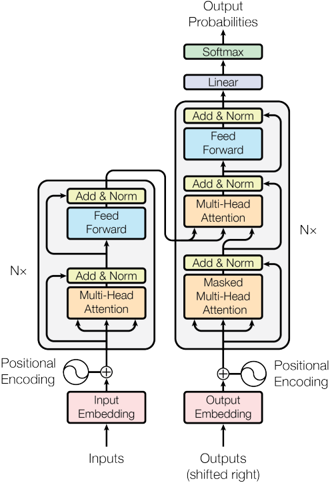

In [12]:
## ImageNode
sample = None
for node in document.nodes:
    if isinstance(node, ImageNode):
        sample = node
        break
    
print(type(sample))
print(sample.id_)
# string resources: text / caption
print("Text:", sample.text)
print("Caption:",sample.caption)

sample.image

In [13]:
# save and load
image_node_dict = sample.to_dict()
sample = ImageNode.from_dict(image_node_dict)

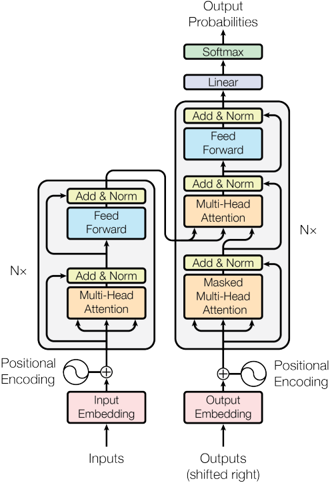

In [14]:
sample.image

# TableNode

<class 'psiking.core.base.schema.TableNode'>
b12e9aaf-8fba-4704-af4b-6975a4d886e4
Text: <table><caption><div class="caption">Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations for different layer types. n is the sequence length, d is the representation dimension, k is the kernel size of convolutions and r the size of the neighborhood in restricted self-attention.</div></caption></table>
Caption: 


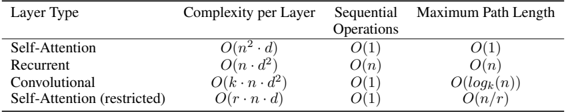

In [15]:
## TableNode
ample = None
for node in document.nodes:
    if isinstance(node, TableNode):
        sample = node
        break
    
print(type(sample))
print(sample.id_)
# string resources: text / caption
print("Text:", sample.text)
print("Caption:",sample.caption)

sample.image